##


## 逻辑回归预测考试成绩能否通过

- 数据：examdata.csv 数据有三个维度，2 个考试成绩(Exam1, Exame2)，1 个标记是否通过考试(Pass，0 或 1)；
- 任务：预测当 Exam1 = 75, Exam2 = 60 时，是否能够通过考试（Pass）;
- 目标：学习逻辑回归的预测原理，以及如何提高建立高阶边界函数（如：二阶边界），提高模型准确度；
- 决策边界函数：
  - 一阶线性：$\theta_0 + \theta_1X_1 + \theta_2X_2 = 0$
  - 二阶：$θ_0 + θ_1X_1 + θ_2X_2 + θ_3X_1^2 + θ_4X_4^2 + θ_5X_1X_2=0$


### 加载数据，了解数据的维度和表头


In [309]:
# load data
import pandas as pd
import numpy as np

data = pd.read_csv("..//dataset//classification//examdata.csv")
data.head()

,Exam1,Exam2,Pass
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### 利用散点图观察数据的分布情况


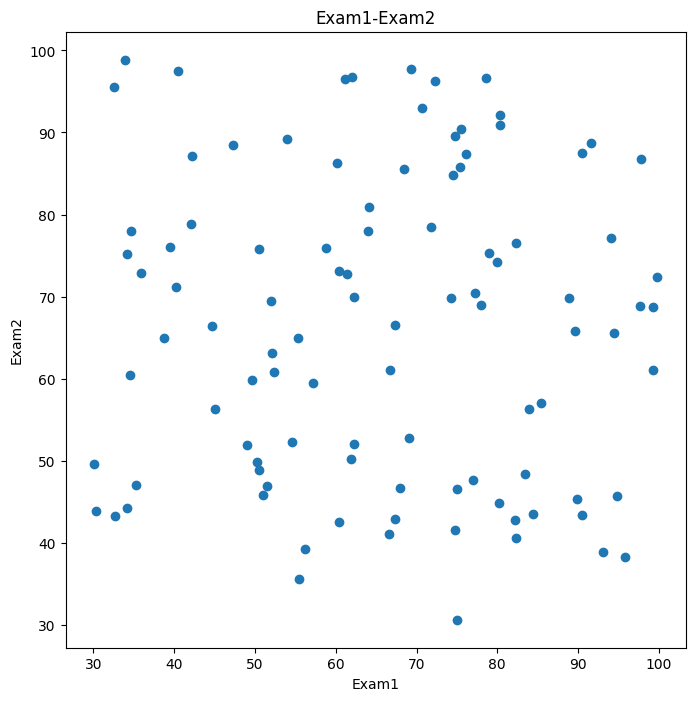

In [310]:
# visualize the data 
%matplotlib inline
from matplotlib import pyplot as plt

fig1 = plt.figure(figsize=(8,8))
plt.scatter(data.loc[:, 'Exam1'], data.loc[:, 'Exam2'])
plt.title('Exam1-Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.show()

### 通过不同的颜色区分出 Pass 和 Failed 的结果


In [311]:
# mask 是一个 boolean 型的 Series
mask = data.loc[:, "Pass"] == 1

print(mask)

0     False
1     False
2     False
3      True
4      True
      ...  
95     True
96     True
97     True
98     True
99     True
Name: Pass, Length: 100, dtype: bool


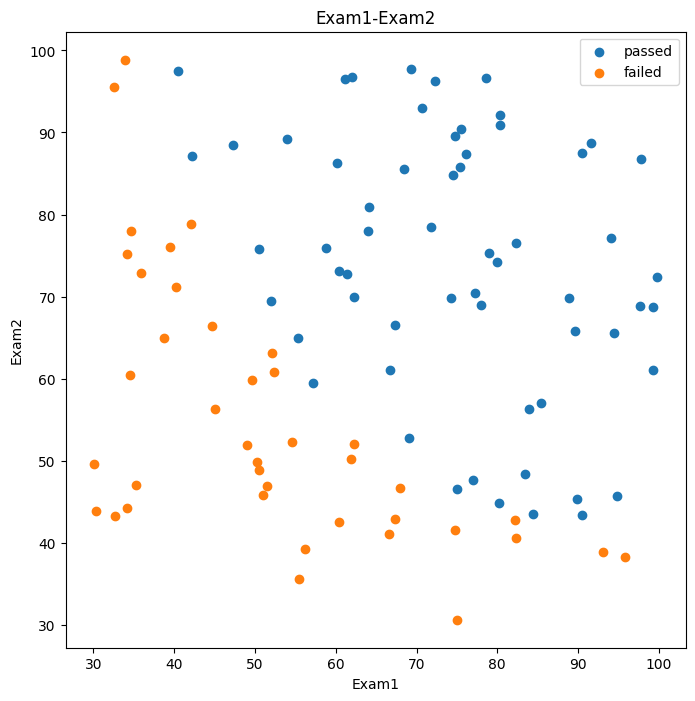

In [312]:
# 通过 mask 做过滤，把 Pass 和 Failed 的数据区分开来
fig2= plt.figure(figsize=(8, 8))

passed = plt.scatter(data.loc[:, "Exam1"][mask], data.loc[:, "Exam2"][mask])
failed = plt.scatter(data.loc[:, "Exam1"][~mask], data.loc[:, "Exam2"][~mask])
plt.title("Exam1-Exam2")
plt.xlabel("Exam1")
plt.ylabel("Exam2")
plt.legend((passed, failed), ("passed", "failed"))
plt.show()

In [313]:
# define X, y
X = data.drop(["Pass"], axis=1)
y = data.loc[:, "Pass"]
X1 = data.loc[:, "Exam1"]
X2 = data.loc[:, "Exam2"]


In [314]:
y.head()

0    0
1    0
2    0
3    1
4    1
Name: Pass, dtype: int64

In [315]:
# 了解 X 和 X1, X2 的数据类型和内容
print(type(X))
print(X.shape)

X2.head()

<class 'pandas.core.frame.DataFrame'>
(100, 2)


0    78.024693
1    43.894998
2    72.902198
3    86.308552
4    75.344376
Name: Exam2, dtype: float64

### 建立逻辑回归模型对象，并通过特征数据X 和 目标变量训练

In [316]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X, y).get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### 针对原始的特征数据 X 进行预测

In [317]:
# show the predicted result and its accuracy
y_predict = lr.predict(X)
print(y_predict)

[0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1
 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1]


### 评估模型的效果，通过 accuracy score 对预测的结果评估

准确率只有 89%， 效果一般

In [318]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y, y_predict)
print(accuracy)

0.89


### 预测当 Exam1 = 75, Exam2 = 60 时，是否能够通过考试（Pass）

In [319]:
# exam1 = 70, exam2=65
X_test = pd.DataFrame([[70, 65]], columns=["Exam1", "Exam2"])
y_test = lr.predict(X_test)
print("passed" if y_test == 1 else "failed")

passed


### 获取一阶线性边界函数中的 theta0，theta1, theta2

- 一阶线性边界函数：theta0 + theta1 * X1 + theta2 * X2 = 0

In [320]:
theta0 = lr.intercept_
theta1, theta2 = lr.coef_[0][0], lr.coef_[0][1]
print(theta0, theta1, theta2)

[-25.05219314] 0.20535491217790397 0.2005838039546906


### 通过 X1 和 X2 绘制边界函数表达的直线

X2是通过边界函数计算出来：X2 = -(theta0+theta2*X1)/theta2

In [321]:
x2_new = -(theta0 + theta1 * X1) / theta2
print(x2_new)

0     89.449169
1     93.889277
2     88.196312
3     63.282281
4     43.983773
        ...    
95    39.421346
96    81.629448
97    23.219064
98    68.240049
99    48.341870
Name: Exam1, Length: 100, dtype: float64


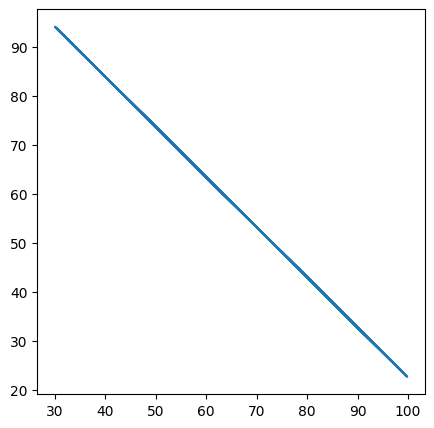

In [322]:
fig3 = plt.figure(figsize=(5, 5))
plt.plot(X1, x2_new)
plt.show()

### 合并展示边界曲线和原始的散点图，观察边界的效果

观察到部分数据点没有被边界曲线区分开，符合 accurate score 是 89% 的直觉

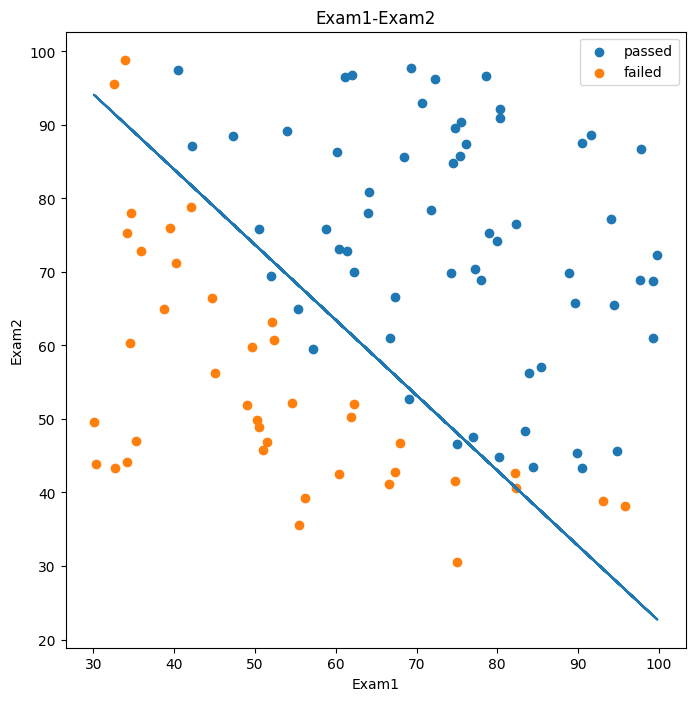

In [323]:
fig4 = plt.figure(figsize=(8, 8))
passed = plt.scatter(data.loc[:, "Exam1"][mask], data.loc[:, "Exam2"][mask])
failed = plt.scatter(data.loc[:, "Exam1"][~mask], data.loc[:, "Exam2"][~mask])
plt.plot(X1, x2_new)
plt.title("Exam1-Exam2")
plt.xlabel("Exam1")
plt.ylabel("Exam2")
plt.legend((passed, failed), ("passed", "failed"))
plt.show()

### 通过二阶边界函数预测，以提高预测的准确率

二阶边界函数：$θ_0 + θ_1X_1 + θ_2X_2 + θ_3X_1^2 + θ_4X_4^2 + θ_5X_1X_2=0$

In [324]:
# 构建 X1的平方，X2的平方，以及X1和X2的乘积
X1_2 = X1 * X1
X2_2 = X2 * X2
X1_X2 = X1 * X2

In [325]:
print(type(X1_2))
print(X1_2)

<class 'pandas.core.series.Series'>
0     1198.797805
1      917.284849
2     1285.036716
3     3621.945269
4     6246.173368
         ...     
95    6970.440295
96    1786.051355
97    9863.470975
98    3062.517544
99    5591.434174
Name: Exam1, Length: 100, dtype: float64


In [326]:
# 通过字典的方式，构建一个DataFrame对象，用来保存多项式特征、特征的平方和特征之间的乘积等
X_new = {"X1": X1, "X2": X2, "X1_2": X1_2, "X2_2": X2_2, "X1_X2": X1_X2}
X_new = pd.DataFrame(X_new)
print(X_new)

           X1         X2         X1_2         X2_2        X1_X2
0   34.623660  78.024693  1198.797805  6087.852690  2701.500406
1   30.286711  43.894998   917.284849  1926.770807  1329.435094
2   35.847409  72.902198  1285.036716  5314.730478  2613.354893
3   60.182599  86.308552  3621.945269  7449.166166  5194.273015
4   79.032736  75.344376  6246.173368  5676.775061  5954.672216
..        ...        ...          ...          ...          ...
95  83.489163  48.380286  6970.440295  2340.652054  4039.229555
96  42.261701  87.103851  1786.051355  7587.080849  3681.156888
97  99.315009  68.775409  9863.470975  4730.056948  6830.430397
98  55.340018  64.931938  3062.517544  4216.156574  3593.334590
99  74.775893  89.529813  5591.434174  8015.587398  6694.671710

[100 rows x 5 columns]


### 创建一个新的逻辑回归模型实例，并使用新的特征集和目标变量来训练这个模型

In [327]:
# new model and train, 设置默认最大迭代次数为 200， 抑制100次迭代没有收敛的警告；
lr2 = LogisticRegression(solver='lbfgs', max_iter=200)
lr2.fit(X_new, y).get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 200,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### 使用新的逻辑回归模型预测，并获得准确率的评估

accuracy score 是 100%，比线性的边界模型的评估效果 89% 要好很多；

In [328]:
y2_predict = lr2.predict(X_new)
accuracy2 = accuracy_score(y, y2_predict)
print(accuracy2)

1.0


In [329]:
# 按照升序排列，计算出的X2会是连续的，能够画出平滑的曲线
X1_new = X1.sort_values()
print(X1_new)

63    30.058822
1     30.286711
57    32.577200
70    32.722833
36    33.915500
        ...    
56    97.645634
47    97.771599
51    99.272527
97    99.315009
75    99.827858
Name: Exam1, Length: 100, dtype: float64


### 根据二阶边界函数, 计算出边界曲线上的数据点 X2

* 二阶边界函数：$\theta_0 + \theta_1 X_1 + \theta_2 X_2+ \theta_3 X_1^2 + \theta_4 X_2^2 + \theta_5 X_1 X_2 = 0$
  * 转化为： $\theta_4 X_2^2 + (\theta_5 X_1++ \theta_2) X_2 + (\theta_0 + \theta_1 X_1 + \theta_3 X_1^2)=0$
  * X1和theta等是已知，求出X2的平方根即可
* 根据二次多项式$a x^2 + b x + c=0$ 的根计算公式：
  * $x1 = (-b+\sqrt[]{(b^2-4ac)})/2a$
  * $x1 = (-b-\sqrt[]{(b^2-4ac)})/2a$


In [330]:
theta0 = lr2.intercept_
theta1, theta2, theta3, theta4, theta5 = (
    lr2.coef_[0][0],
    lr2.coef_[0][1],
    lr2.coef_[0][2],
    lr2.coef_[0][3],
    lr2.coef_[0][4],
)
print(theta0, theta1, theta2, theta3, theta4, theta5)

[-451.3847195] 0.0020467253392502326 -0.0006638162238242784 -0.02024865429015822 -0.019991259962486175 0.17598640198365179


In [331]:
a = theta4
b = theta5 * X1_new + theta2
c = theta0 + theta1 * X1_new + theta3 * X1_new * X1_new
# TODO 需要解决 < 0 的问题
print((b * b - 4 * a * c))

63     -9.576579
1      -9.172944
57     -4.946732
70     -4.667609
36     -2.334871
         ...    
56    243.760078
47    244.482593
51    253.163320
97    253.410942
75    256.408635
Name: Exam1, Length: 100, dtype: float64


In [332]:
x2_new_boundary = (-b + np.sqrt(b * b - 4 * a * c)) / (2 * a)

print(x2_new_boundary)

63          NaN
1           NaN
57          NaN
70          NaN
36          NaN
        ...    
56    39.287725
47    39.263884
51    38.988143
97    38.980558
75    38.889918
Name: Exam1, Length: 100, dtype: float64


c:\Users\WindW\anaconda3\envs\ai_basic\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


### 绘制边界曲线，了解其形状

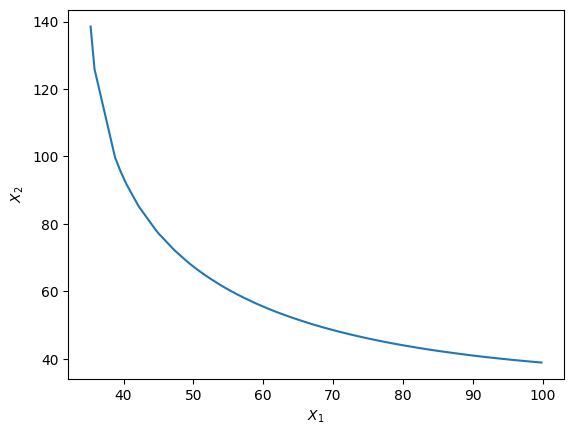

In [333]:
fig5 = plt.figure()
plt.plot(X1_new, x2_new_boundary)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

### 整合边界曲线和散点图，查看其预测的准确性，符合 accuracy score 是1的评估结果

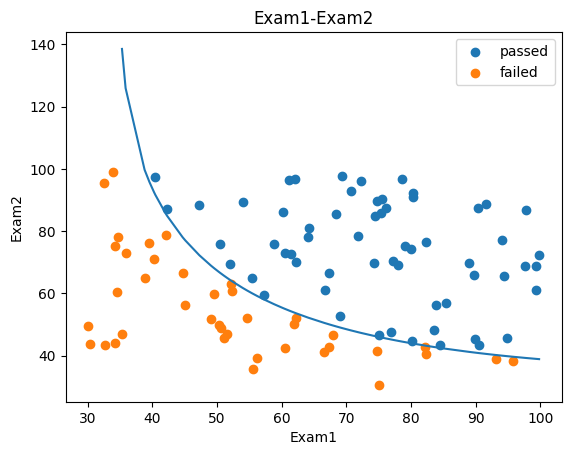

In [334]:
fig6 = plt.figure()
passed = plt.scatter(data.loc[:, "Exam1"][mask], data.loc[:, "Exam2"][mask])
failed = plt.scatter(data.loc[:, "Exam1"][~mask], data.loc[:, "Exam2"][~mask])
plt.plot(X1_new, x2_new_boundary)
plt.title("Exam1-Exam2")
plt.xlabel("Exam1")
plt.ylabel("Exam2")
plt.legend((passed, failed), ("passed", "failed"))
plt.show()